# Coursework 2: Comparing SKLEARN Clustering Algorithms

In [217]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
import scipy.cluster.hierarchy as shc
import hdbscan
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

# 1.

In [218]:
#Load the 'cluster_data.npy'
data = np.load('cluster_data.npy')

In [219]:
data

array([[-0.12153499, -0.22876337],
       [-0.22093687, -0.25251088],
       [ 0.1259037 , -0.27314321],
       ...,
       [ 0.50243143, -0.3002958 ],
       [ 0.53822256,  0.19412199],
       [-0.08688887, -0.2092721 ]])

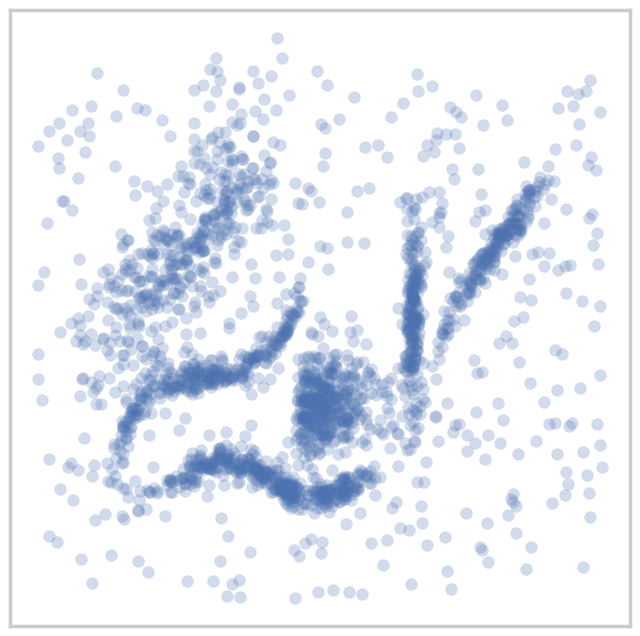

In [220]:
#Scatter plot the 'cluster_data.npy' 
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)


In [221]:
#Establish the plot_clusters(data, algorithm, args, kwds)little utility function to do the clustering and plot the results for us
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.54, 0.68, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)


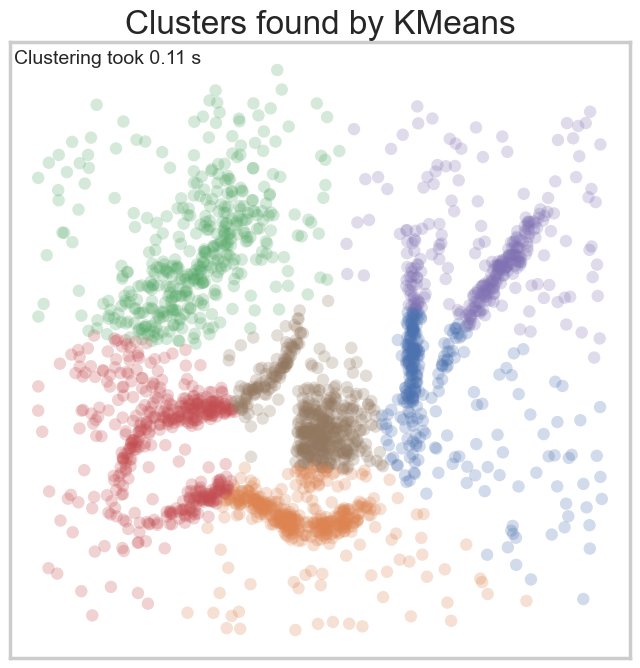

In [222]:
#Plotting an example model
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

## 2. K-Means

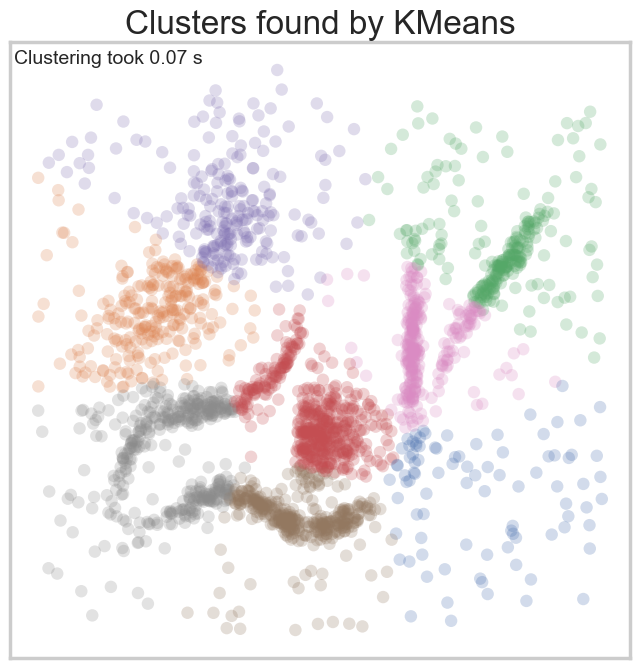

In [242]:
#Plotting the KMeans model with default hyperparameters
plot_clusters(data, cluster.KMeans, (), {})

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

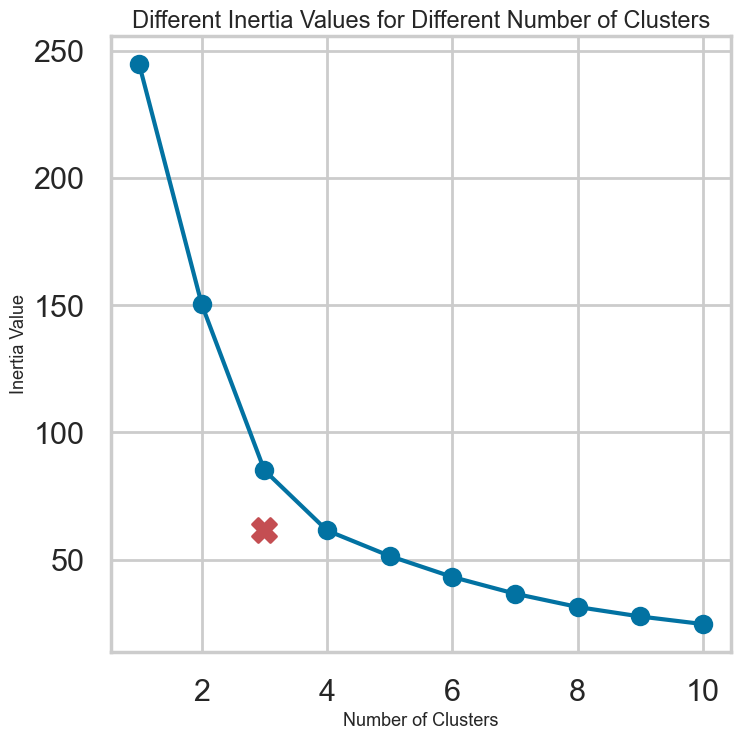

In [225]:
#Finding the best cluster number with elbow method
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

inertia_list = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(max_iter=1000, n_clusters=num_clusters, init="k-means++")
    kmeans_model.fit(data)
    inertia_list.append(kmeans_model.inertia_)
    
# plot the inertia curve
plt.plot(range(1,11),inertia_list)
plt.scatter(range(1,11),inertia_list)
plt.scatter(3, inertia_list[3], marker="X", s=300, c="r")
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters", size=17)

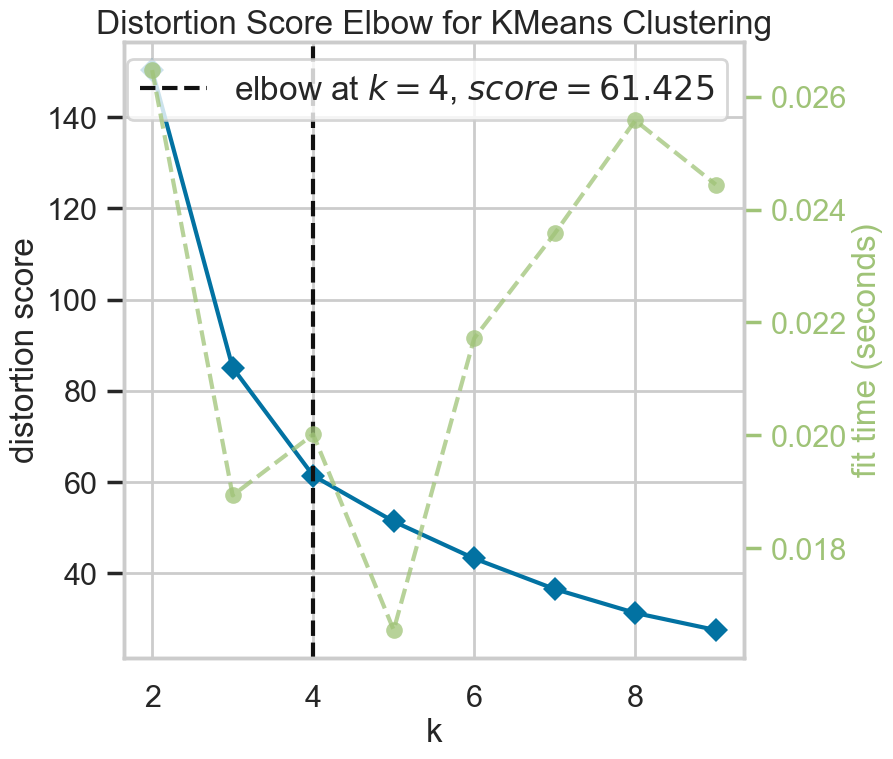

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [252]:
#pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans_model, k=(2,10))
visualizer.fit(data)
visualizer.show()

In [226]:
#Finding the best random_state hyperparameter number with the inertia score
random_state_list = np.arange(1, 1001, 1)
inertia_list = []
for random_state in random_state_list:
    kmeans_model = KMeans(max_iter=1000, n_clusters=3, random_state=random_state)
    kmeans_model.fit(data)
    inertia_list.append(kmeans_model.inertia_)

results = pd.DataFrame(data=inertia_list, columns=["Inertia Value"], index=random_state_list)
print(results[results['Inertia Value'] == results['Inertia Value'].min()])

      Inertia Value
1         85.102898
3         85.102898
4         85.102898
10        85.102898
11        85.102898
...             ...
990       85.102898
993       85.102898
994       85.102898
998       85.102898
1000      85.102898

[242 rows x 1 columns]


In [227]:
#Finding the best init hyperparameter number with the inertia score
init_list = ["k-means++", "random"]
inertia_list = []
for init in init_list:
    kmeans_model = KMeans(random_state=1, max_iter=1000, n_clusters=3, init=init)
    kmeans_model.fit(data)
    inertia_list.append(kmeans_model.inertia_)

results = pd.DataFrame(data=inertia_list, columns=["Inertia Value"], index=init_list)
print(results[results['Inertia Value'] == results['Inertia Value'].min()])

           Inertia Value
k-means++      85.102898
random         85.102898


In [228]:
#Finding the best n_init hyperparameter number with the inertia score
n_init_list = np.append(["auto"],np.arange(1, 101, 1))
inertia_list = []
for n_init in n_init_list:
    if n_init not in ["auto"]:
        n_init = int(n_init)
    kmeans_model = KMeans(random_state=1, max_iter=1000, n_clusters=3, n_init=n_init)
    kmeans_model.fit(data)
    inertia_list.append(kmeans_model.inertia_)

results = pd.DataFrame(data=inertia_list, columns=["Inertia Value"], index=n_init_list)
print(results[results['Inertia Value'] == results['Inertia Value'].min()])

     Inertia Value
5        85.102898
6        85.102898
7        85.102898
8        85.102898
9        85.102898
..             ...
96       85.102898
97       85.102898
98       85.102898
99       85.102898
100      85.102898

[96 rows x 1 columns]


In [229]:
#Finding the best tol hyperparameter number with the inertia score
tol_list = [1e-4, 2e-4, 3e-4, 5e-4]
inertia_list = []
for tol in tol_list:
    max_iter = int(max_iter)
    kmeans_model = KMeans(random_state=1, max_iter=1000, n_clusters=3, n_init=5, tol=tol)
    kmeans_model.fit(data)
    inertia_list.append(kmeans_model.inertia_)

results = pd.DataFrame(data=inertia_list, columns=["Inertia Value"], index=tol_list)
print(results[results['Inertia Value'] == results['Inertia Value'].min()])

        Inertia Value
0.0001      85.102898
0.0002      85.102898
0.0003      85.102898


In [230]:
#Finding the best verbose hyperparameter number with the inertia score
verbose_list = np.arange(0, 11, 1)
inertia_list = []
for verbose in verbose_list:
    verbose = int(verbose)
    kmeans_model = KMeans(random_state=1, max_iter=1000, n_clusters=3, n_init=5, verbose=verbose)
    kmeans_model.fit(data)
    inertia_list.append(kmeans_model.inertia_)

results = pd.DataFrame(data=inertia_list, columns=["Inertia Value"], index=verbose_list)
print(results[results['Inertia Value'] == results['Inertia Value'].min()])

Initialization complete
Iteration 0, inertia 106.63019366174332.
Iteration 1, inertia 87.67337316492313.
Iteration 2, inertia 87.36208268313452.
Iteration 3, inertia 87.29903380379395.
Iteration 4, inertia 87.24394570491961.
Iteration 5, inertia 87.19242687436837.
Iteration 6, inertia 87.09672702224704.
Iteration 7, inertia 86.87713538184563.
Iteration 8, inertia 86.37583242028602.
Iteration 9, inertia 85.68888942565897.
Iteration 10, inertia 85.24492060737305.
Iteration 11, inertia 85.13204869347206.
Iteration 12, inertia 85.1074033360382.
Converged at iteration 12: center shift 5.008137549491677e-06 within tolerance 5.302402598843445e-06.
Initialization complete
Iteration 0, inertia 106.16616021562362.
Iteration 1, inertia 89.45322818031019.
Iteration 2, inertia 87.89548072254337.
Iteration 3, inertia 87.45203556562717.
Iteration 4, inertia 87.34496771765752.
Iteration 5, inertia 87.32085357319042.
Converged at iteration 5: center shift 1.0594083435391397e-06 within tolerance 5.30240

In [231]:
#Finding the best copy_x hyperparameter number with the inertia score
copy_x_list = [True, False]
inertia_list = []
for copy_x in copy_x_list:
    kmeans_model = KMeans(random_state=1, max_iter=1000, n_clusters=3, n_init=5, copy_x=copy_x)
    kmeans_model.fit(data)
    inertia_list.append(kmeans_model.inertia_)

results = pd.DataFrame(data=inertia_list, columns=["Inertia Value"], index=copy_x_list)
print(results[results['Inertia Value'] == results['Inertia Value'].min()])

       Inertia Value
True       85.102898
False      85.102898


In [168]:
#Finding the best copy_x hyperparameter number with the inertia score
copy_x_list = [True, False]
inertia_list = []
for copy_x in copy_x_list:
    kmeans_model = KMeans(random_state=37, max_iter=1000, n_clusters=3, copy_x=copy_x)
    kmeans_model.fit(data)
    inertia_list.append(kmeans_model.inertia_)

results = pd.DataFrame(data=inertia_list, columns=["Inertia Value"], index=copy_x_list)
print(results[results['Inertia Value'] == results['Inertia Value'].min()])

       Inertia Value
True       85.102898
False      85.102898


In [232]:
#Finding the best algorithm hyperparameter number with the inertia score
algorithm_list = ["lloyd", "elkan", "auto", "full"]
inertia_list = []
for algorithm in algorithm_list:
    kmeans_model = KMeans(random_state=1, max_iter=1000, n_clusters=3, n_init=5, algorithm=algorithm)
    kmeans_model.fit(data)
    inertia_list.append(kmeans_model.inertia_)

results = pd.DataFrame(data=inertia_list, columns=["Inertia Value"], index=algorithm_list)
print(results[results['Inertia Value'] == results['Inertia Value'].min()])

       Inertia Value
lloyd      85.102898
elkan      85.102898
auto       85.102898
full       85.102898


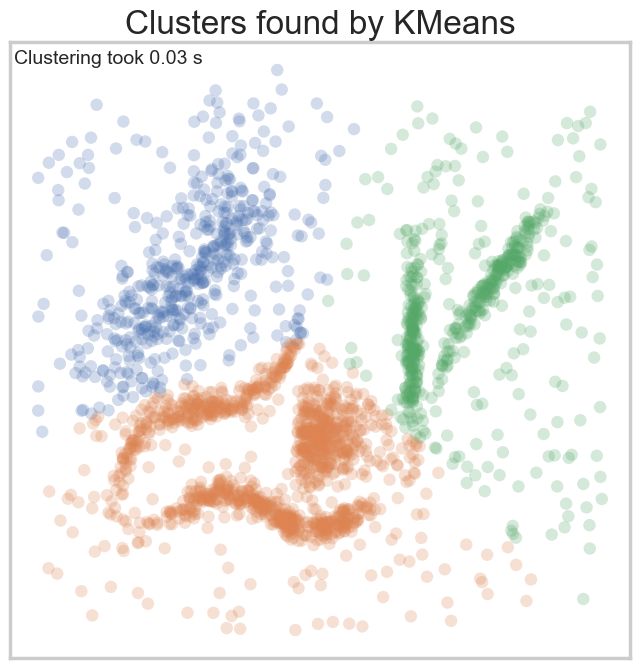

In [243]:
#Plotting the KMeans model with the best parameters
plot_clusters(data, cluster.KMeans, (), {'n_clusters':3, "random_state":1, "max_iter":1000, "n_init":5})

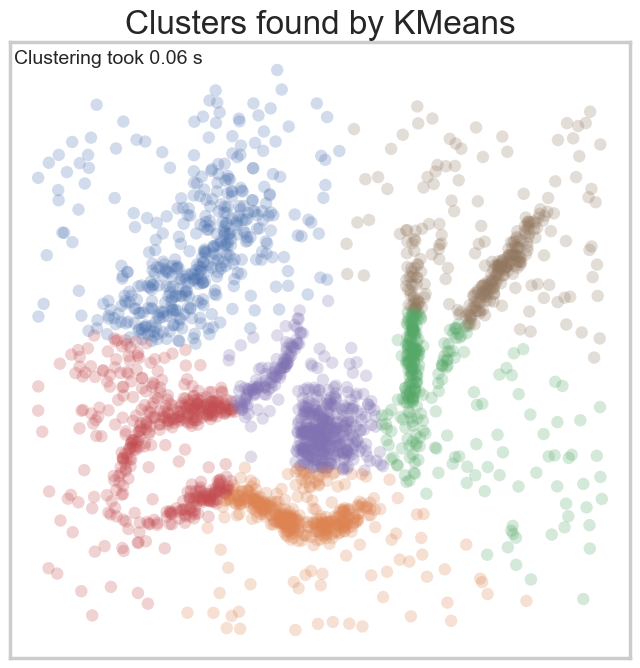

In [258]:
#Plotting the KMeans model with the best parameters
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

## 2. Affinity Propagation

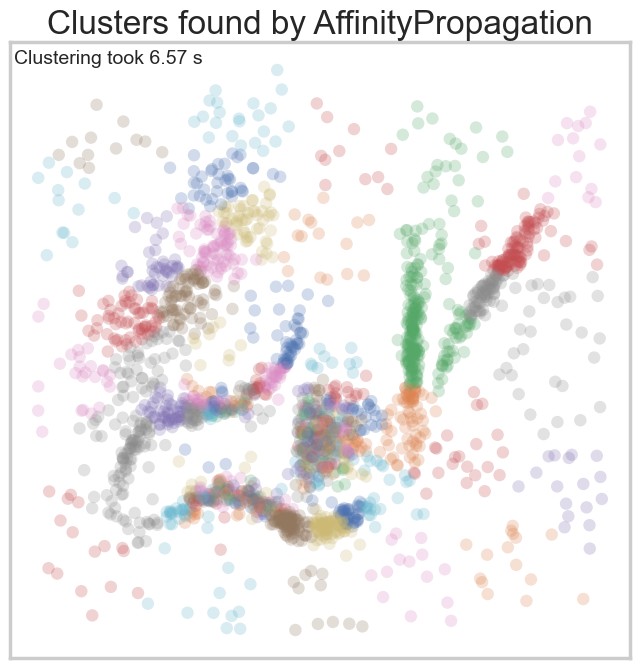

In [245]:
#Plotting the Affinity Propagation model with the default parameters
plot_clusters(data, cluster.AffinityPropagation, (), {})

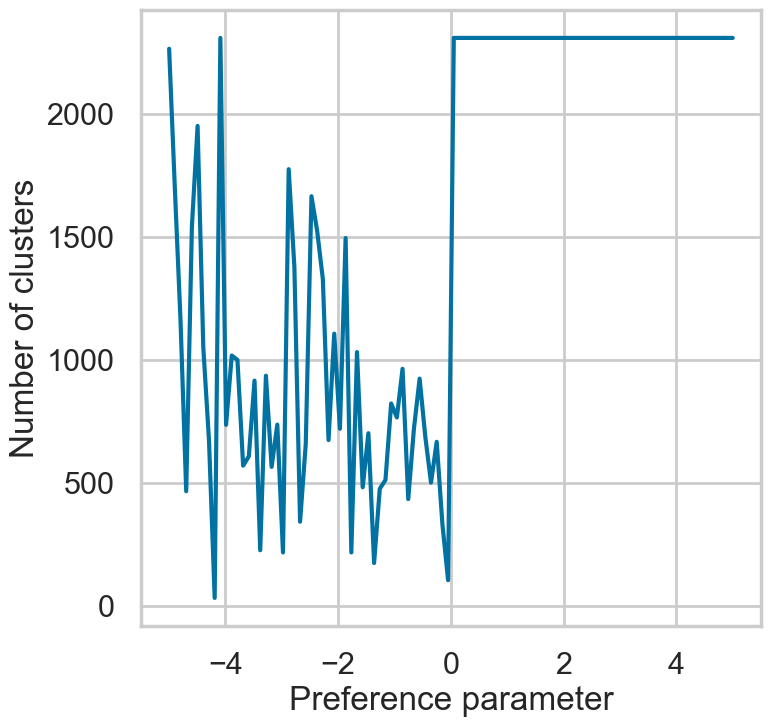

In [260]:
from sklearn.cluster import AffinityPropagation
import numpy as np
import matplotlib.pyplot as plt

# Try different preference parameter values
prefs = np.linspace(-5, 5, 100)
n_clusters = []

# Fit the clustering model for each preference parameter value
for pref in prefs:
    af = AffinityPropagation(preference=pref)
    af.fit(data)
    n_clusters.append(len(af.cluster_centers_indices_))

# Plot the results
plt.plot(prefs, n_clusters)
plt.xlabel("Preference parameter")
plt.ylabel("Number of clusters")
plt.show()


In [262]:
min(n_clusters)

31

In [267]:
from sklearn.cluster import AffinityPropagation
import numpy as np
import matplotlib.pyplot as plt

# Try different preference parameter values
prefs = np.linspace(-50, 0, 10)
dampings = np.linspace(0.5, 0.99, 10)
n_clusters = []
parameters = list()

# Fit the clustering model for each preference parameter value
for pref in prefs:
    for damping in dampings:
        af = AffinityPropagation(preference=pref, damping=damping)
        af.fit(data)
        n_clusters.append(len(af.cluster_centers_indices_))
        used_parameters = "preference: " + str(pref) + ", " + "damping: " + str(damping)
        parameters.append(used_parameters)

df = pd.DataFrame(n_clusters, index =parameters, columns =['Cluster_Number'])
df

,Cluster_Number
"preference: -50.0, damping: 0.5",2309
"preference: -50.0, damping: 0.5544444444444444",0
"preference: -50.0, damping: 0.6088888888888889",2306
"preference: -50.0, damping: 0.6633333333333333",2309
"preference: -50.0, damping: 0.7177777777777777",1
...,...
"preference: 0.0, damping: 0.7722222222222221",2309
"preference: 0.0, damping: 0.8266666666666667",2309
"preference: 0.0, damping: 0.8811111111111111",2309
"preference: 0.0, damping: 0.9355555555555555",2309


In [270]:
df[df.Cluster_Number==3].sort_values(by=['Cluster_Number'])

,Cluster_Number
"preference: -50.0, damping: 0.8811111111111111",3
"preference: -27.77777777777778, damping: 0.8811111111111111",3
"preference: -27.77777777777778, damping: 0.8266666666666667",3
"preference: -33.333333333333336, damping: 0.9355555555555555",3
"preference: -33.333333333333336, damping: 0.8811111111111111",3
"preference: -33.333333333333336, damping: 0.8266666666666667",3
"preference: -33.333333333333336, damping: 0.7722222222222221",3
"preference: -33.333333333333336, damping: 0.7177777777777777",3
"preference: -38.888888888888886, damping: 0.9355555555555555",3
"preference: -27.77777777777778, damping: 0.9355555555555555",3


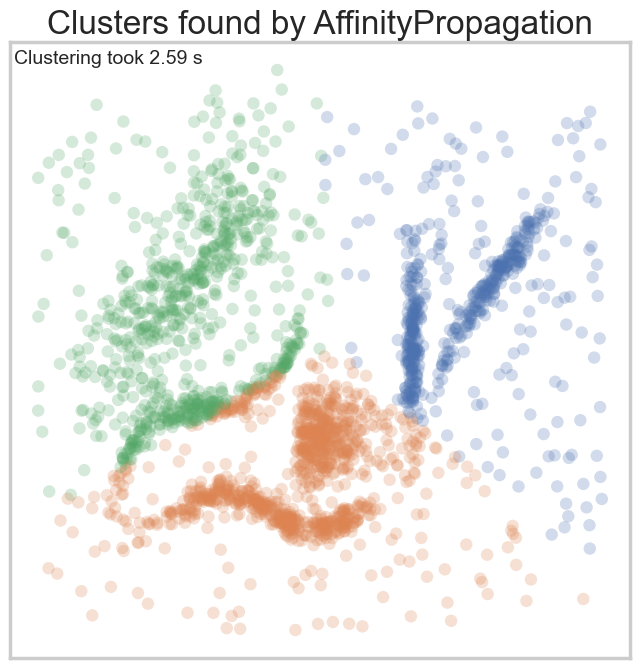

In [176]:
#Plotting the Affinity Propagation model
plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-30.0, 'damping':0.95})

## 3. Mean Shift

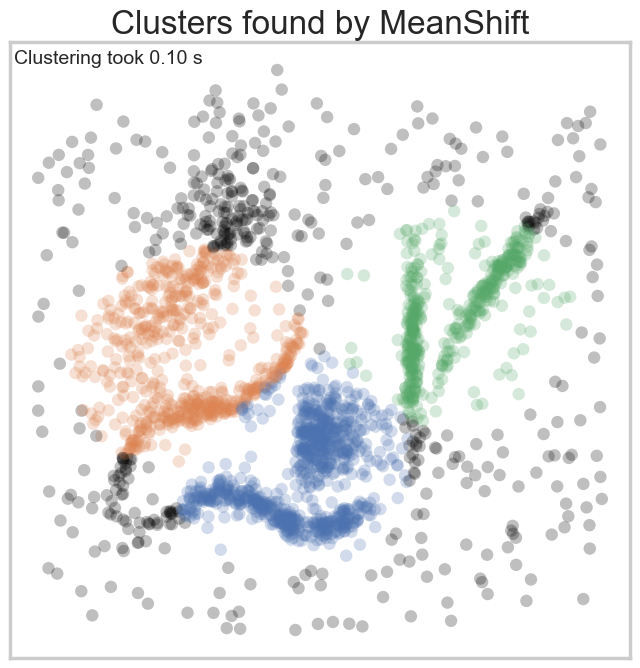

In [194]:
plot_clusters(data, cluster.MeanShift, (), {'bandwidth':cluster.estimate_bandwidth(data, quantile=.2, n_samples=769),
                                                  'bin_seeding':True, 'cluster_all':False})

## 4. Spectral Clustering

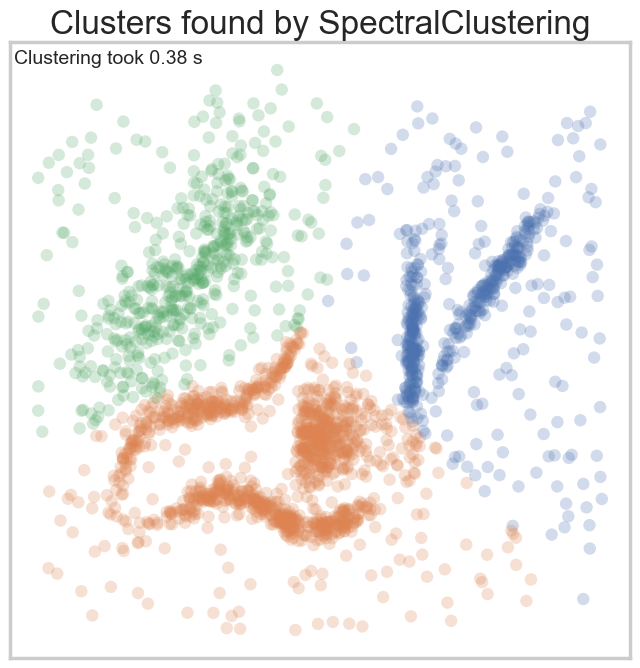

In [195]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters':3})

## 5. Agglomerative Clustering

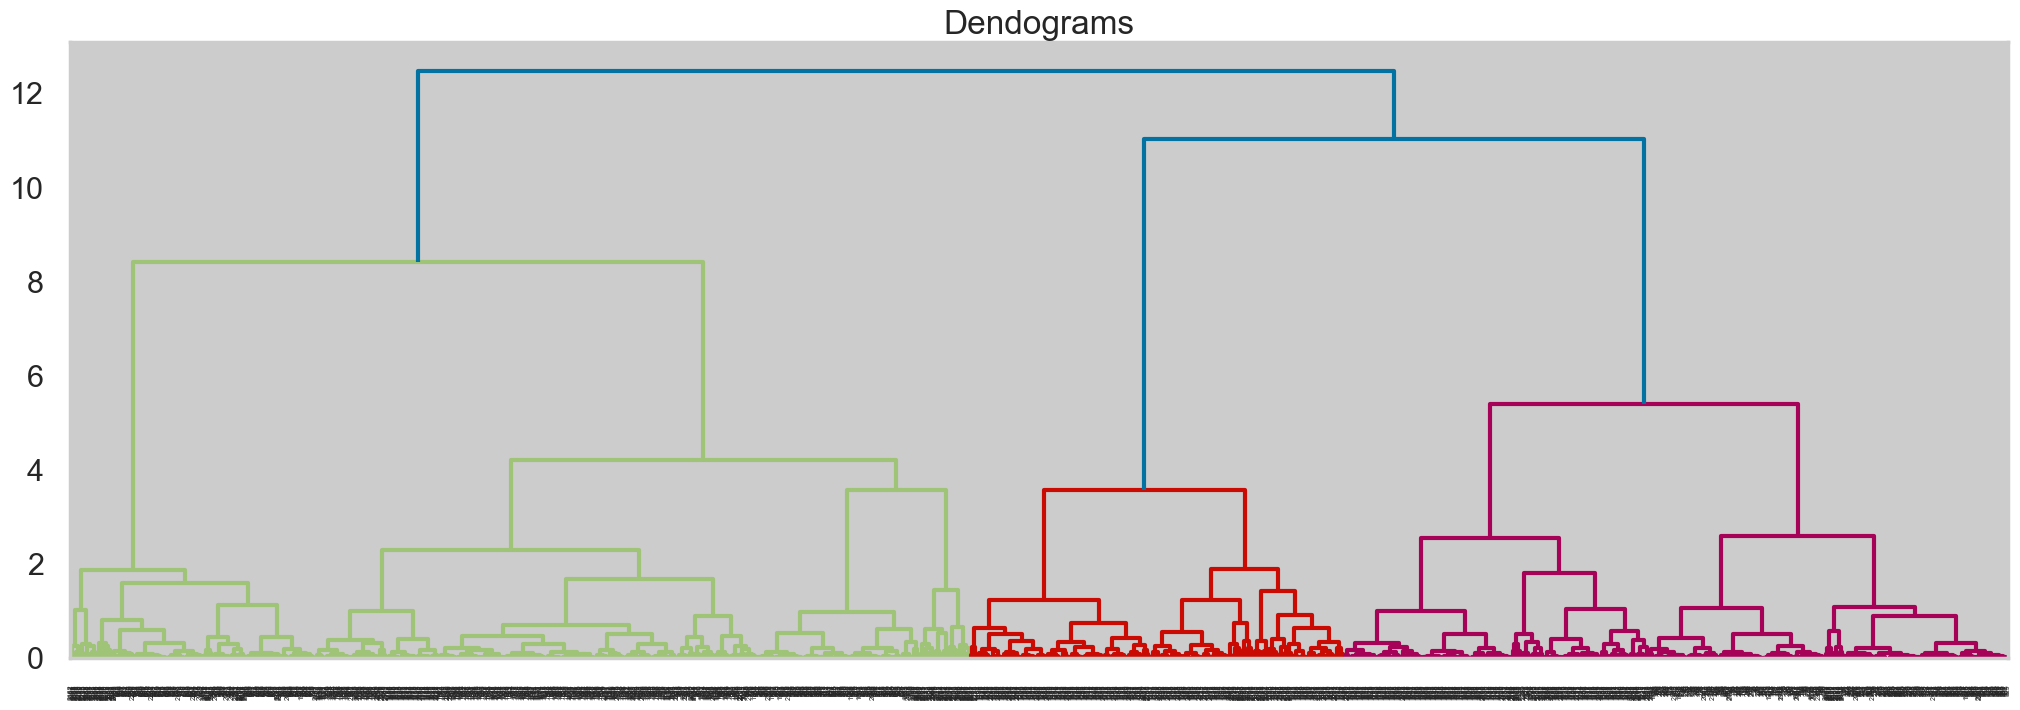

In [197]:
plt.figure(figsize=(25, 8))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

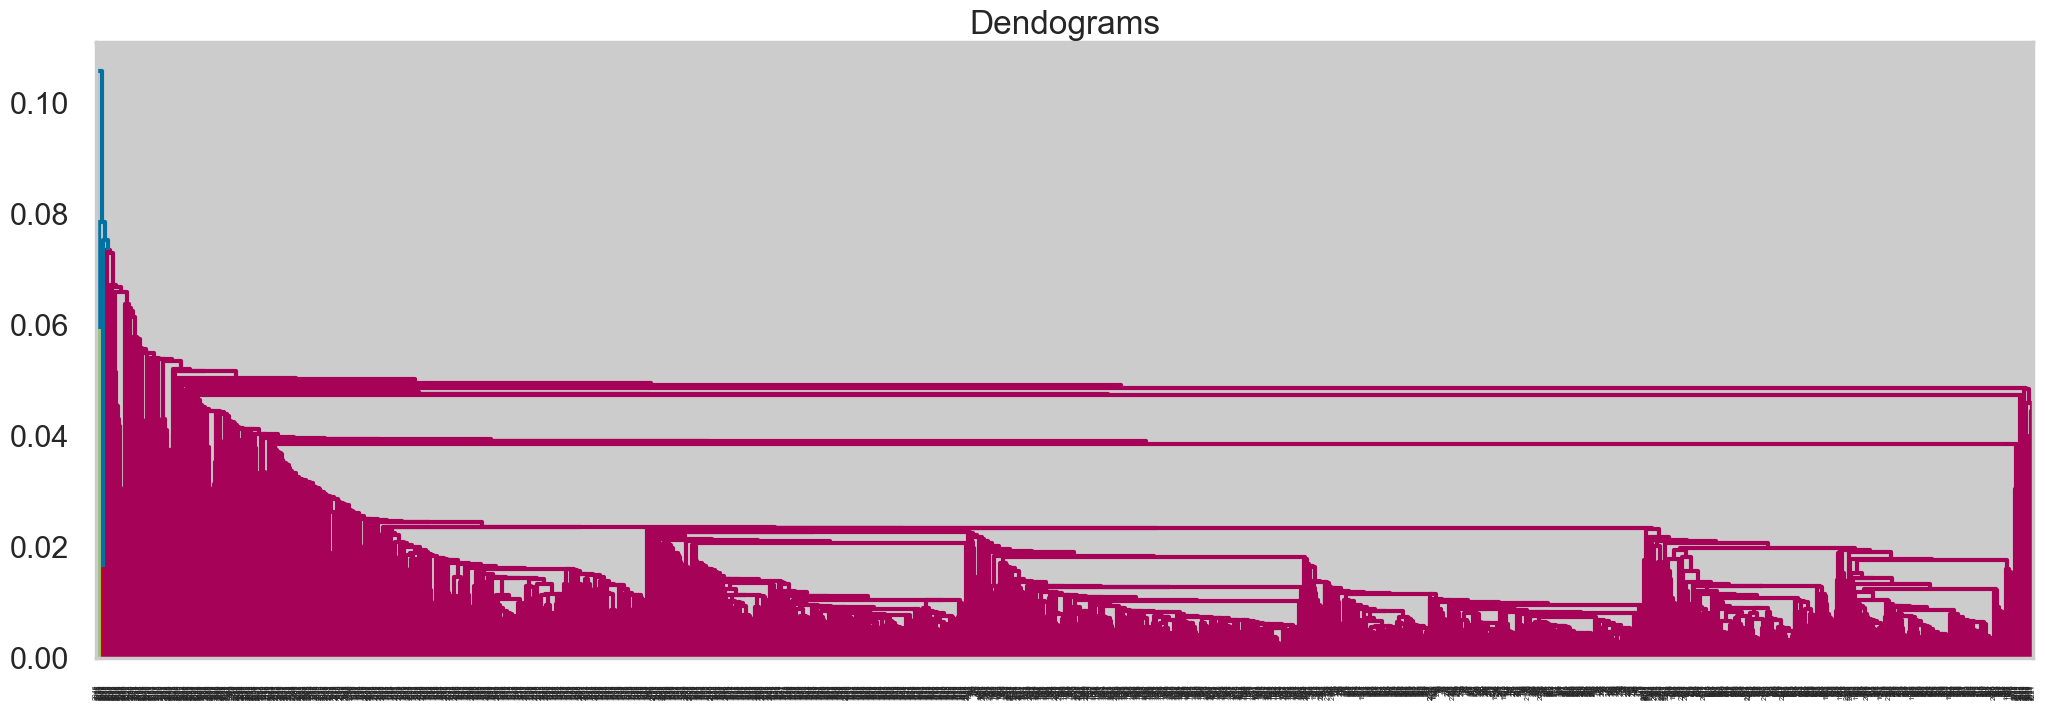

In [198]:
plt.figure(figsize=(25, 8))
plt.title("Dendograms")
dend2 = shc.dendrogram(shc.linkage(data, method='single'))

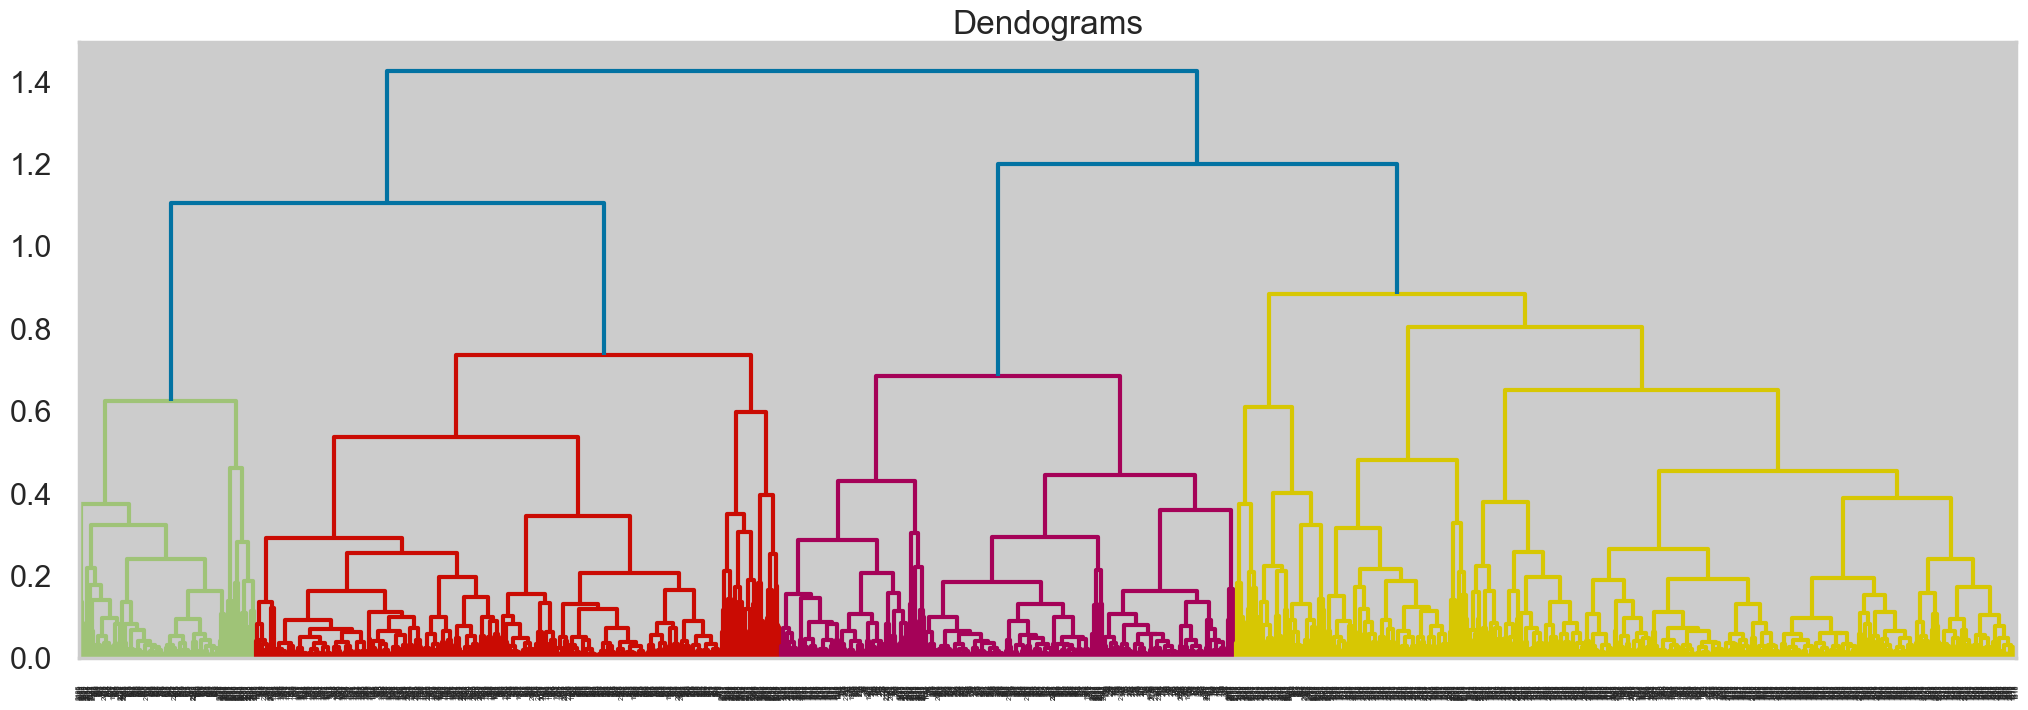

In [199]:
plt.figure(figsize=(25, 8))
plt.title("Dendograms")
dend3 = shc.dendrogram(shc.linkage(data, method='complete'))

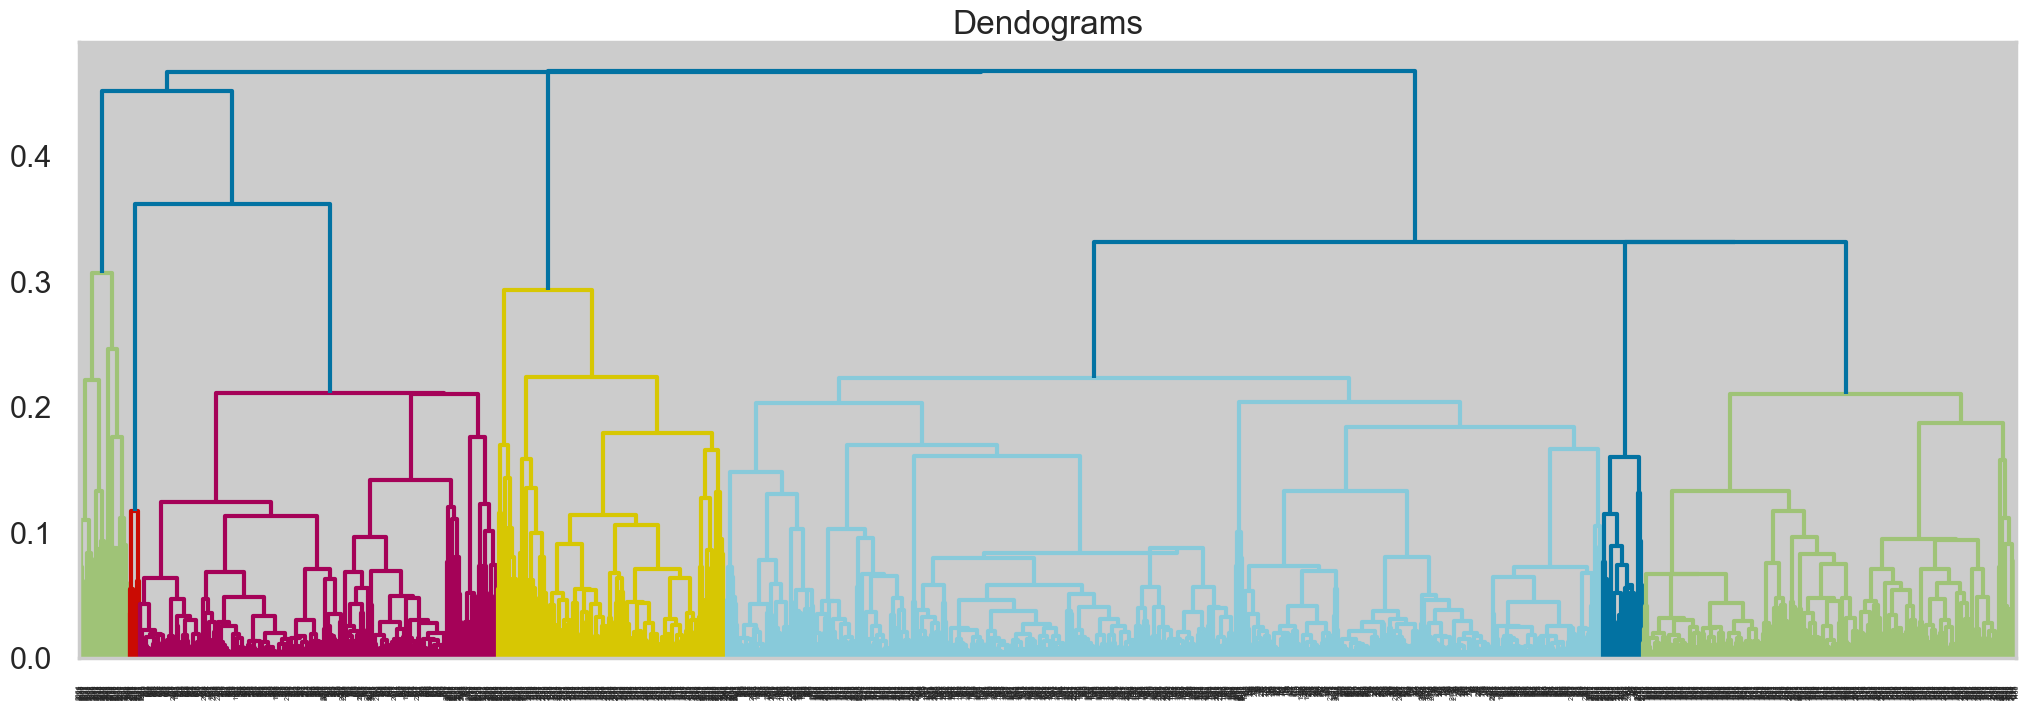

In [200]:
plt.figure(figsize=(25, 8))
plt.title("Dendograms")
dend4 = shc.dendrogram(shc.linkage(data, method='centroid'))

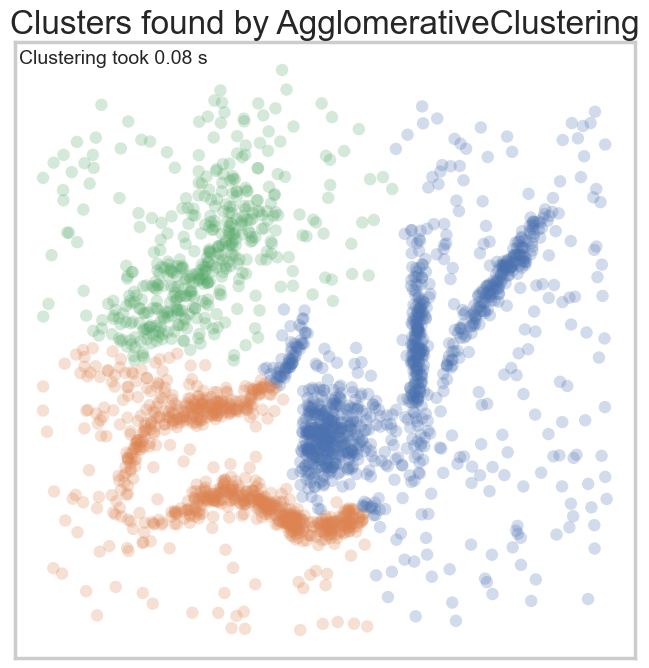

In [201]:
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':3, 'linkage':'ward'})

## 6. HDBSCAN

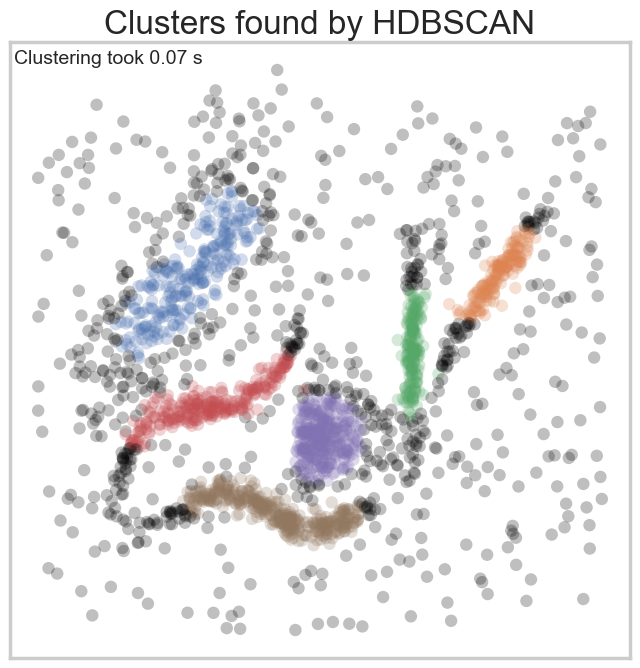

In [213]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':50})

In [ ]:
hdbscan.HDBSCAN()